# Sentiment Analysis using NLP Techniques

### Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#### Download necessary NLTK resources

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Step 2: Load Dataset

In [7]:
dataset_path = 'twitter_training.csv'
df = pd.read_csv(dataset_path, header=None)

#### Assign column names

In [8]:
df.columns = ['ID', 'Entity', 'Sentiment', 'Text']

#### Drop unnecessary columns

In [9]:
df = df[['Sentiment', 'Text']]

#### Inspect the first few rows

In [10]:
df.head()

,Sentiment,Text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


### Step 3: Data Preprocessing

In [16]:
def preprocess_text(text):
    if isinstance(text, str):  # Check if text is a string
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'http\S+', '', text)  # Remove URLs
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
        tokens = word_tokenize(text)  # Tokenization
        tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
        return ' '.join(tokens)
    else:
        return ""

#### Apply preprocessing

In [17]:
df['Cleaned_Text'] = df['Text'].apply(preprocess_text)

### Step 4: Encode sentiment labels

In [18]:
df['Sentiment'] = df['Sentiment'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})

### Step 5: Split data into train and test sets

In [22]:
print(df['Sentiment'].isna().sum())
print(df['Sentiment'].unique())  # Check all unique values in sentiment column
df.dropna(subset=['Sentiment'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_Text'], df['Sentiment'], test_size=0.2, random_state=42)

12990
[ 1.  2.  0. nan]


### Step 6: Feature Extraction using TF-IDF

In [23]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

### Step 7: Train a Naive Bayes Model

In [25]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()

### Step 8: Make predictions

In [27]:
y_pred = model.predict(X_test_tfidf)

### Step 9: Evaluate Model

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.78
              precision    recall  f1-score   support

         0.0       0.72      0.90      0.80      4509
         1.0       0.78      0.80      0.79      4180
         2.0       0.89      0.58      0.71      3650

    accuracy                           0.78     12339
   macro avg       0.80      0.76      0.77     12339
weighted avg       0.79      0.78      0.77     12339



### Step 10: Confusion Matrix

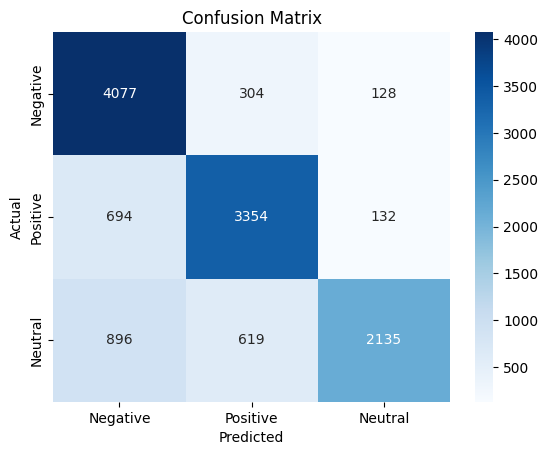

In [29]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()